 1 - Analyser les images 
 2 - Saisir mes préférences 
 3 - Recommandations d'images 
 4 - Se connecter
 q - Pour quitter 
4
Mode : Choix Utilisateur
-----------------
     1 - Créér un nouvel utilisateur 
     2 - lala
     3 - aldoisn
     4 - eaifnx
     5 - Jeremi
     q - Quittez la sélection d'utilisateur 
-----------------
1
Entrer le nom de l'utilisateur : Raal
 1 - Analyser les images 
 2 - Saisir mes préférences 
 3 - Recommandations d'images 
 4 - Se connecter
 q - Pour quitter 
2
Mode : Saisir mes préférences


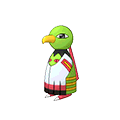

1 pour liker 0 sinon
1
-----------------
     1 - Voire une nouvelle image 
     q - Quittez les préférences 
-----------------
1


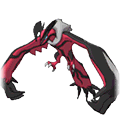

1 pour liker 0 sinon
1
-----------------
     1 - Voire une nouvelle image 
     q - Quittez les préférences 
-----------------
1


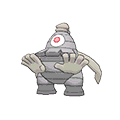

1 pour liker 0 sinon
1
-----------------
     1 - Voire une nouvelle image 
     q - Quittez les préférences 
-----------------


KeyboardInterrupt: Interrupted by user

In [77]:
import requests
import json
import os
import glob
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import pandas as pd
import time
import random
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
#numpy.set_printoptions(threshold=20)

#Define global variables
cheminImage = "./images/"
cheminData = "./Data/"
preferenceFileName = "preference.csv"
userFileName = "user.csv"
pokemonFileName = "pokemon.csv"
global currentUserId
currentUserId = -1

def showImage(nom):
    im = Image.open(nom)
    #weigth,heigth = im.size
    matrice_pixels = im.load()
    #im.show()
    display(im)


def getImages():
    listeFichiers = []
    for (repertoire, sousRepertoires, fichiers) in os.walk(cheminImage):
        listeFichiers.extend(fichiers)
        break
    return listeFichiers

def getFileName(fileName,listeFichiers):
    for name in listeFichiers:
        if name.startswith(fileName):
            return name

def setPreferencesByName(pokemonIndex,preferences):
    global currentUserId
    
    df = pd.read_csv(cheminData + preferenceFileName)
    index = df.count().User
    df.at[index, 'User'] = currentUserId
    df.at[index, 'Image'] = pokemonIndex
    df.at[index, 'Preference'] = preferences
    df.to_csv(cheminData + preferenceFileName, index=False)
    
def analyseCouleursImage(image):
    if os.path.exists(image):
        imgfile = Image.open(image)
        numarray = numpy.array(imgfile.getdata(), numpy.uint8)
        if(numarray.ndim != 2):
            numarray = numarray.reshape(-1,4)
        clusters = KMeans(n_clusters=4)
        clusters.fit(numarray)
        couleurs = []
        #Ne recuperes pas la premieres couleur des images qui est le fond transparent
        for i in range(1,4):
            couleurs.append("(" + str(math.ceil(clusters.cluster_centers_[i][0])) + "," + str(math.ceil(clusters.cluster_centers_[i][1])) + "," + str(math.ceil(clusters.cluster_centers_[i][2])) + ")")

        return couleurs
    else : 
        print("Erreurs : aucune images ne correspond à :" + image)
        
def analyseFormatImage(image):
    if os.path.exists(image):
        imgfile = Image.open(image)
        weigth,heigth = imgfile.size
        extension = os.path.splitext(image)
        if weigth > heigth :
            orientation = "paysage"
        elif weigth < heigth :
            orientation = "portrait"
        elif weigth == heigth :
            orientation = "carré"
        
        formats = []
        formats.append(weigth)
        formats.append(heigth)
        formats.append(extension[1][1:])
        formats.append(orientation)        
        return formats
    else : 
        print("Erreurs : aucune images ne correspond à :" + image)    
    
def setInformationImages(listeFichiers) : 
    df = pd.read_csv(cheminData + pokemonFileName)
    
    if not df.empty: 
        for index, row in df.iterrows():
            couleurs = analyseCouleursImage(cheminImage + getFileName(row['Name'],listeFichiers))
            formats = analyseFormatImage(cheminImage + getFileName(row['Name'],listeFichiers))
            
            df.at[index, 'Couleur1'] = couleurs[0]
            df.at[index, 'Couleur2'] = couleurs[1]
            df.at[index, 'Couleur3'] = couleurs[2]
            df.at[index, 'Largeur'] = formats[0]
            df.at[index, 'Hauteur'] = formats[1]
            df.at[index, 'Extension'] = formats[2]
            df.at[index, 'Orientation'] = formats[3]
            
        #print(df)
        df.to_csv(cheminData + pokemonFileName, index=False)
        print("Image analysé")
    else :
        print("Erreurs lors de l'ouverture du fichier csv !")
       
def setPreferences(listeFichier):
    df = pd.read_csv(cheminData + pokemonFileName)
    if not df.empty:
        numberOfLine = df.count().Name;
        choix = '1'
        while choix.lower() != 'q' :
            # gestion preferences 
            if choix.lower() == '1':
                #Find a random image
                imageIndex = random.randrange(1,numberOfLine);
                showImage(cheminImage + listeFichier[imageIndex])
                print("1 pour liker 0 sinon")
                preferences = input()
                while preferences.lower() != '1' and preferences.lower() != '0' : 
                    print("Valeur non reconnue")
                    preferences = input()
                    
                # Set preferences   
                pokemonName = os.path.splitext(listeFichier[imageIndex])
                indexRow = df.index[df['Name']==pokemonName[0]].tolist()
                setPreferencesByName(indexRow[0], preferences)
                            
            # Gestion menu
            print("-----------------")
            print("     1 - Voire une nouvelle image ")
            print("     q - Quittez les préférences ")
            print("-----------------")
            choix = input()
            if choix.lower() == 'q':
                print("Sortie du mode enregistrement des préferences")

def recommanderImage(listeFichier):
    data = pd.read_csv(cheminData + pokemonFileName) #,dtype={'Name': str,'Type1': str,'Type2': str,'Couleur1': str,'Couleur2': str,'Couleur3': str,'Largeur': pd.int32,'Hauteur': pd.int32,'Extension': str,'Orientation': str})
    result = pd.read_csv(cheminData + preferenceFileName)
    
    #Trier les resultat 
    print("TODO : Filter by user")
    result.sort_values(by=['Image'], inplace=True)
    
    #garder que les bonne lignes dans data 
    data = data[data.index.isin(result.Image.tolist())]
    print(data.dtypes)
    print("test avec des types dans les colonnes")
    
    # génération d'étiquettes numériques
    le1 = LabelEncoder()
    data["Name"] = le1.fit_transform(data["Name"])

    le2 = LabelEncoder()
    data["Type1"] = le2.fit_transform(data["Type1"])

    #le3 = LabelEncoder()
    #data["Type2"] = le3.fit_transform(data["Type2"])
    print("TODO : Remettre une le type 2 et mettre none dans la colonne quand il n'y as rien")
    
    le4 = LabelEncoder()
    data["Couleur1"] = le4.fit_transform(data["Couleur1"])

    le5 = LabelEncoder()
    data["Couleur2"] = le5.fit_transform(data["Couleur2"])
    
    le6 = LabelEncoder()
    data["Couleur3"] = le1.fit_transform(data["Couleur3"])

    le7 = LabelEncoder()
    data["Largeur"] = le7.fit_transform(data["Largeur"])

    le8 = LabelEncoder()
    data["Hauteur"] = le8.fit_transform(data["Hauteur"])

    le9 = LabelEncoder()
    data["Extension"] = le9.fit_transform(data["Extension"])
    
    le10 = LabelEncoder()
    data["Orientation"] = le10.fit_transform(data["Orientation"])

    le11 = LabelEncoder()
    result["User"] = le11.fit_transform(result["User"])

    le12 = LabelEncoder()
    result["Image"] = le12.fit_transform(result["Image"])

    le13 = LabelEncoder()
    result["Preference"] = le13.fit_transform(result["Preference"])
    
    dtc = tree.DecisionTreeClassifier()
    dtc = dtc.fit(data, result)

#Return username or null when quit
def chooseUser():
    choix = "S"
    firstIndex = 2
    listUserId = {"Name":[],"Id":[]}
    
    #Create user tab
    user = pd.read_csv(cheminData + userFileName)
    for index, row in user.iterrows():
        listUserId["Name"].append(row['Name'])
        listUserId["Id"].append(row['Id'])

    while choix.lower() != 'q':
        if choix.lower() == '1':
            name = input("Entrer le nom de l'utilisateur : ")
            idUser = len(listUserId["Id"]) + 1
            user.at[idUser,"Id"] = idUser
            user.at[idUser,"Name"] = name
            user.to_csv(cheminData + userFileName, index=False)
            return idUser
            
        elif choix.isdigit() and int(choix.lower()) > 1 and int(choix.lower()) <= (firstIndex + len(listUserId["Name"])):
            print("Connecté en tant que " + listUserId["Name"][int(choix.lower())-firstIndex])
            return listUserId["Id"][int(choix.lower())-firstIndex]
        
        # Gestion menu
        print("-----------------")
        print("     1 - Créér un nouvel utilisateur ")
        for i in range(len(listUserId["Name"])):
            print("     " + str(firstIndex + i) + " - " + listUserId["Name"][i])
        print("     q - Quittez la sélection d'utilisateur ")
        print("-----------------")
        choix = input()
    return -1

def console(listeFichier):
    global currentUserId
    
    choix = "l"
    while choix.lower() != 'q':
        print("=======================================================")
        print(" 1 - Analyser les images ")
        print(" 2 - Saisir mes préférences ")
        print(" 3 - Recommandations d'images ")
        print(" 4 - Se connecter")
        print(" q - Pour quitter ")
        print("=======================================================")
        choix  = input()

        if choix.lower() == '1' : 
            print("Analyse des images")
            setInformationImages(listeFichier)
            print("Image analysé")
        elif choix.lower() == '2':
            if currentUserId != -1:
                print("Mode : Saisir mes préférences")
                setPreferences(listeFichier)
            else : 
                print("Aucun utilisateur connecter")
        elif choix.lower() == '3':
            if currentUserId != -1:
                print("Mode : Recommandations d'images")
                recommanderImage(listeFichier)
            else : 
                print("Aucun utilisateur connecter")
        elif choix.lower() == '4':
            print("Mode : Choix Utilisateur")
            currentUserId = chooseUser()
        elif choix.lower() == 'q':
            print("Fermeture de l'application")
        else :
            print("Choix non reconnue") 
        
if __name__ == '__main__':
    listeFichier = getImages()
    console(listeFichier)

# Collecte de données
Dataset pokemon recuperer depuis kaggles.com  
Gestion pas encore automatique

Mise en place de gestion d'utilisateurs


# Attention faires des vue par exmeple le nombre de fichier avec telle ou telle couleur, le pourcentage de fichier ayant cette taille ext.. 

# Faire des test : test noté (dire mon sys marche pour telle valeurs ext ..)